In [1]:
%run supportvectors-common.ipynb



<div style="color:#aaa;font-size:8pt">
<hr/>

 </blockquote>
 <hr/>
</div>



#   Univariate 3



This dataset is available on the github url:  **https://github.com/supportvectors/ml-100**. 

## Prerequisites

Before you study this notebook, you must have gone through and understood the detailed notes in data science notebooks:

* Notebook 1: `univariate-1.ipynb`
* Notebook 2: `dataset-2.ipynb`
* Notebook 3: `runge-phenomenon-dataset-3.ipynb`
* Notebook 4: `univariate-2.ipynb`

Many of the pertinent discussions are present therein; for brevity, we will not repeat those explanations, and will omit some of the steps, so that we can focus on the main topic on this notebook.

## Lab Goals

* We will explore this data, observe its statistical characteristics, visualize it.
* Next, we will take a systematic approach to build  linear and polynomial regression models to make prediction on the data. 

## Outcome

This lab should have given you some fluency in dealing with polynomial regression.

## Load and explore the data

Let us load the data from the specified url, into a Pandas dataframe. Looking at the github site mentioned above, we see that the dataset is stored as a CSV file, and can be accessed at the url:
https://raw.githubusercontent.com/supportvectors/ml-100/master/univariate-3.csv

Let us, therefore, load it, and perform some basic explorations.

In [2]:
source = 'https://raw.githubusercontent.com/supportvectors/ml-100/master/univariate-3.csv'
data = pd.read_csv(source)

Now, let's get some rows of the data to get a feel for it. We have a few choices here:

* `head()` will give us the first few rows of data, `head(n)` will give us specifically the first `n` rows of data
* `tail()` will give us the last few rows of data, `tail(n)` will give us specifically the last `n` rows of data

In [3]:
data.head()

,x,y
0,0.00000,5.666695
1,0.01001,-4.023974
2,0.02002,3.879246
3,0.03003,4.890735
4,0.04004,3.651074


In [4]:
data.tail()

,x,y
995,9.95996,94.966180
996,9.96997,84.066887
997,9.97998,91.915703
998,9.98999,91.001905
999,10.00000,94.853932


In [5]:
data.sample(5)

,x,y
521,5.215215,18.930270
737,7.377377,62.659941
740,7.407407,56.589526
660,6.606607,55.275728
411,4.114114,-1.479027


#### Descriptive statistics
Pandas dataframe gives a convenient method to quickly observe the key descriptive statistics.

In [6]:
data.describe(include="all").transpose()

,count,mean,std,min,25%,50%,75%,max
x,1000.0,5.000000,2.891085,0.000000,2.500000,5.000000,7.500000,10.000000
y,1000.0,35.139028,31.446307,-11.643464,9.620289,19.761214,62.698243,102.949634


#### Missing Values Analysis


In [7]:
data.isnull().sum()

x    0
y    0
dtype: int64

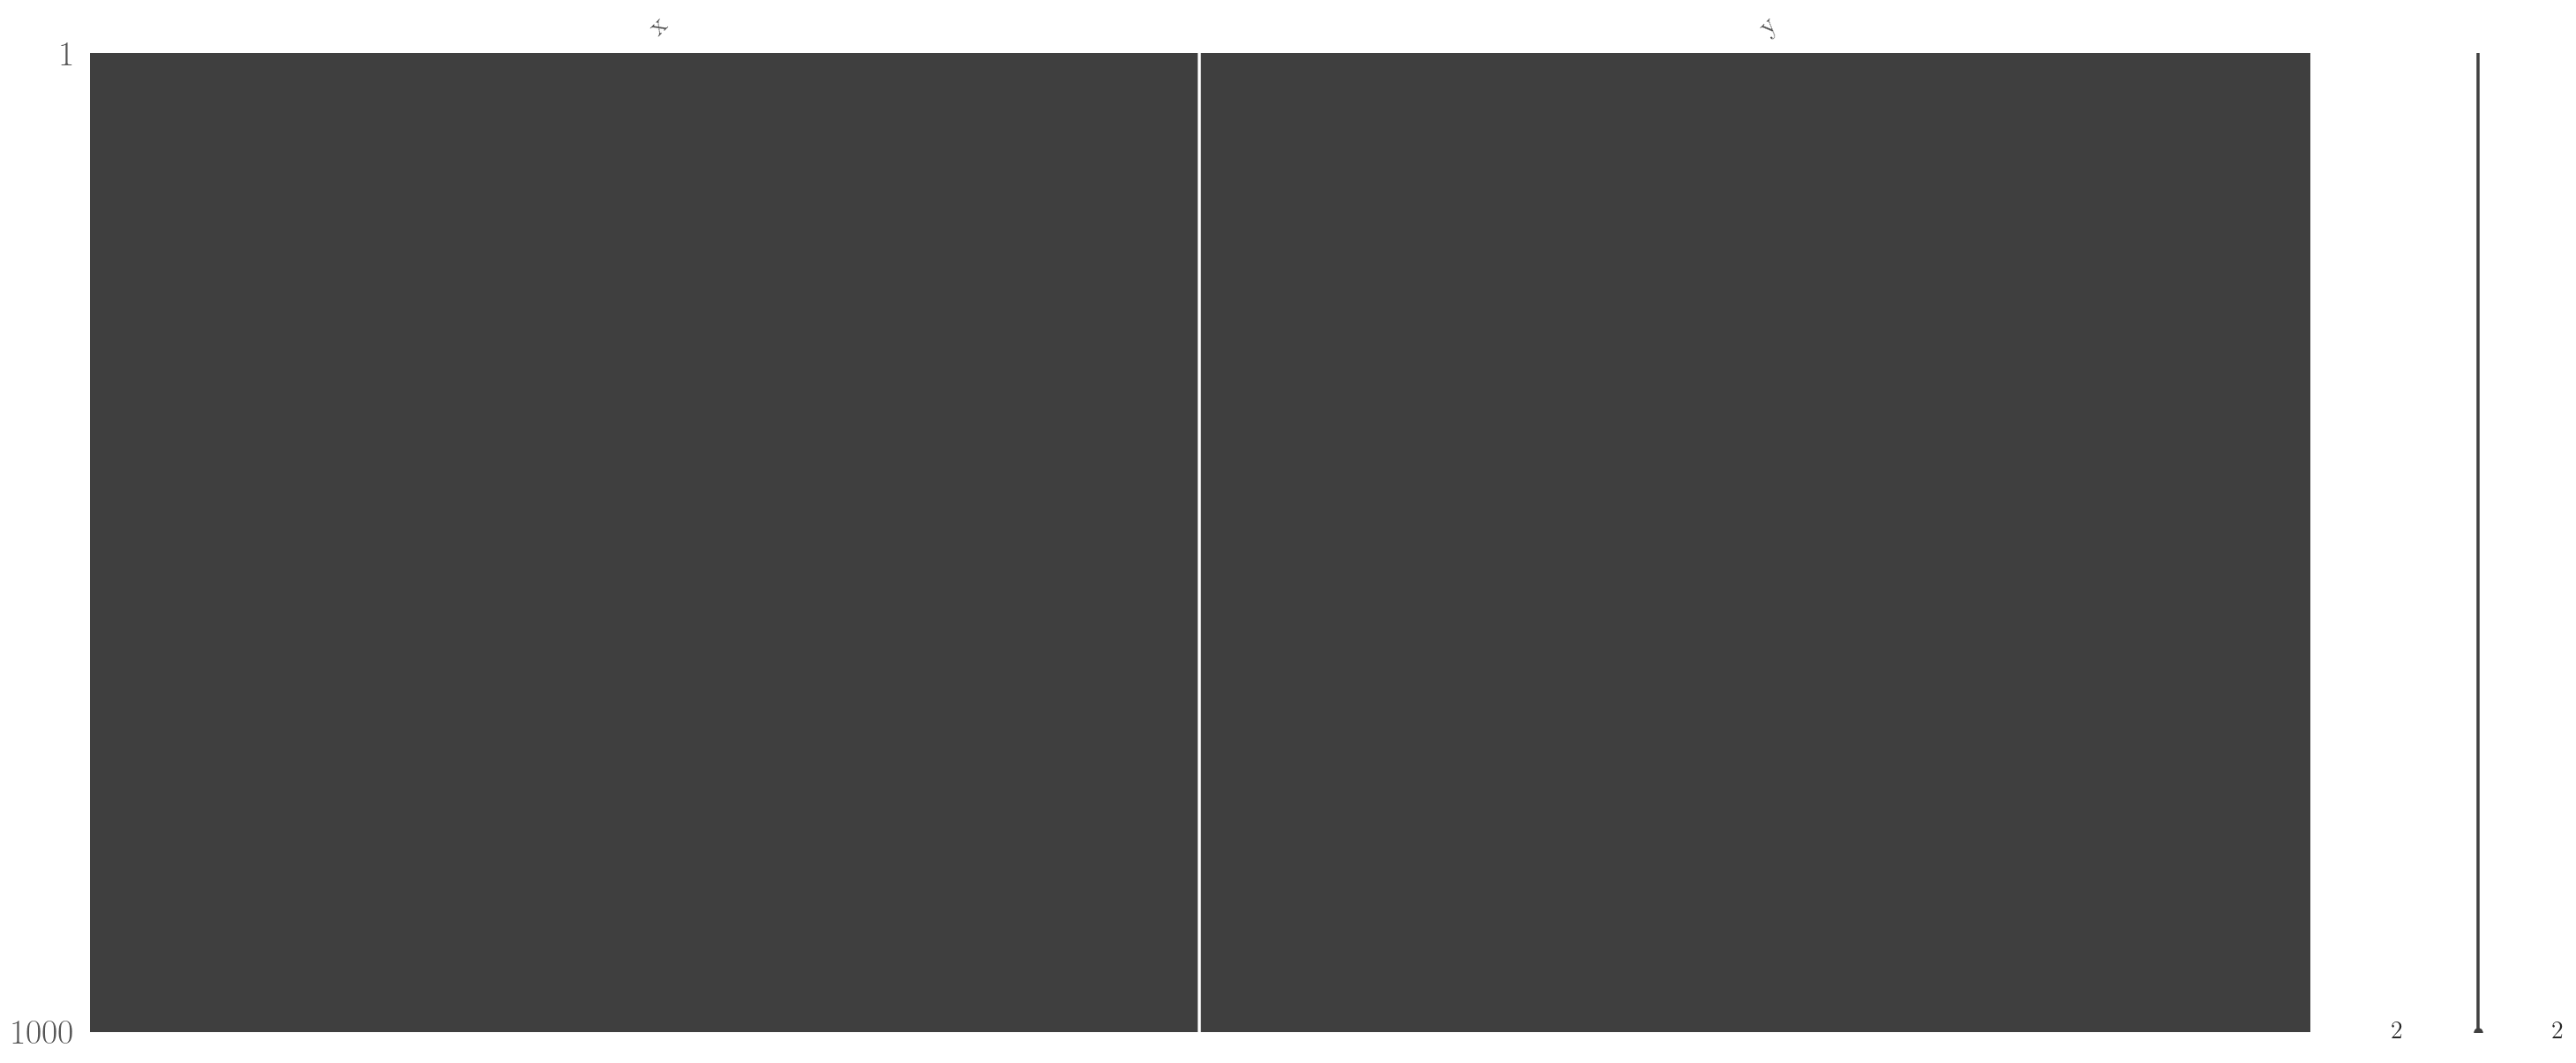

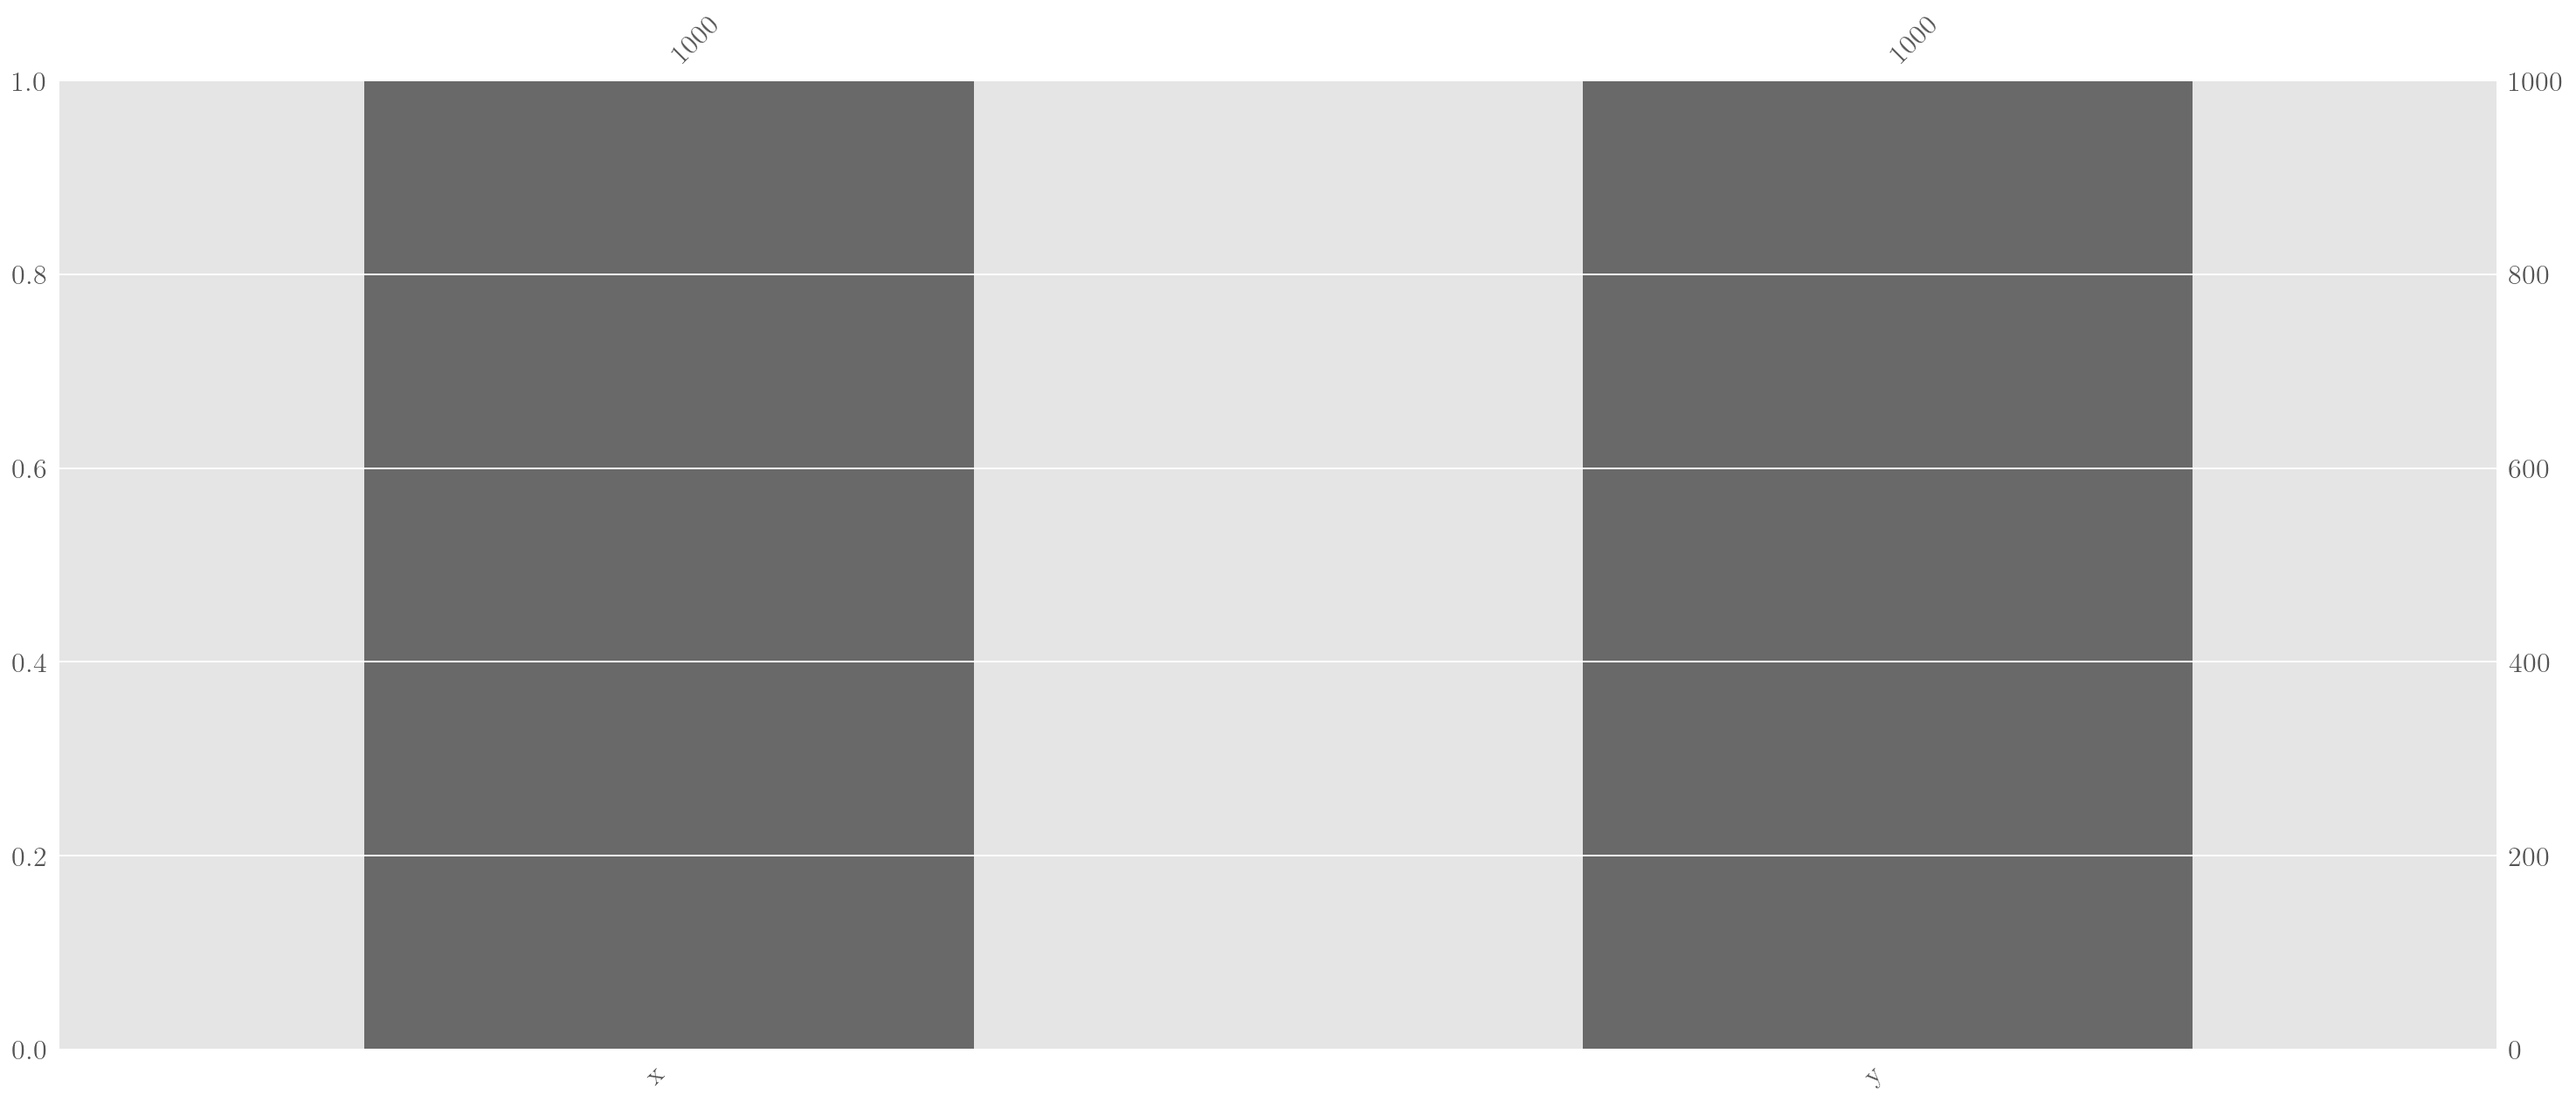

In [8]:
import missingno as msno
msno.matrix(data);
plt.show()
msno.bar(data);
plt.show()

 From the above results, it appears that there are no missing values at all. Therefore, we don't need to worry about addressing this issue.

## Data Visualization

### Plotting using matplotlib

Observe that the data distinctly exhibits nonlinearity of relationship between $x$ and $y$. **Can you guess what the correlation is between the variables?** Try finding the answer programmatically, and see if it agrees with your guess. What does it say about the relationship between $x$ and $y$?

Is this data reminiscent of some ubiquitous curve you encounter?

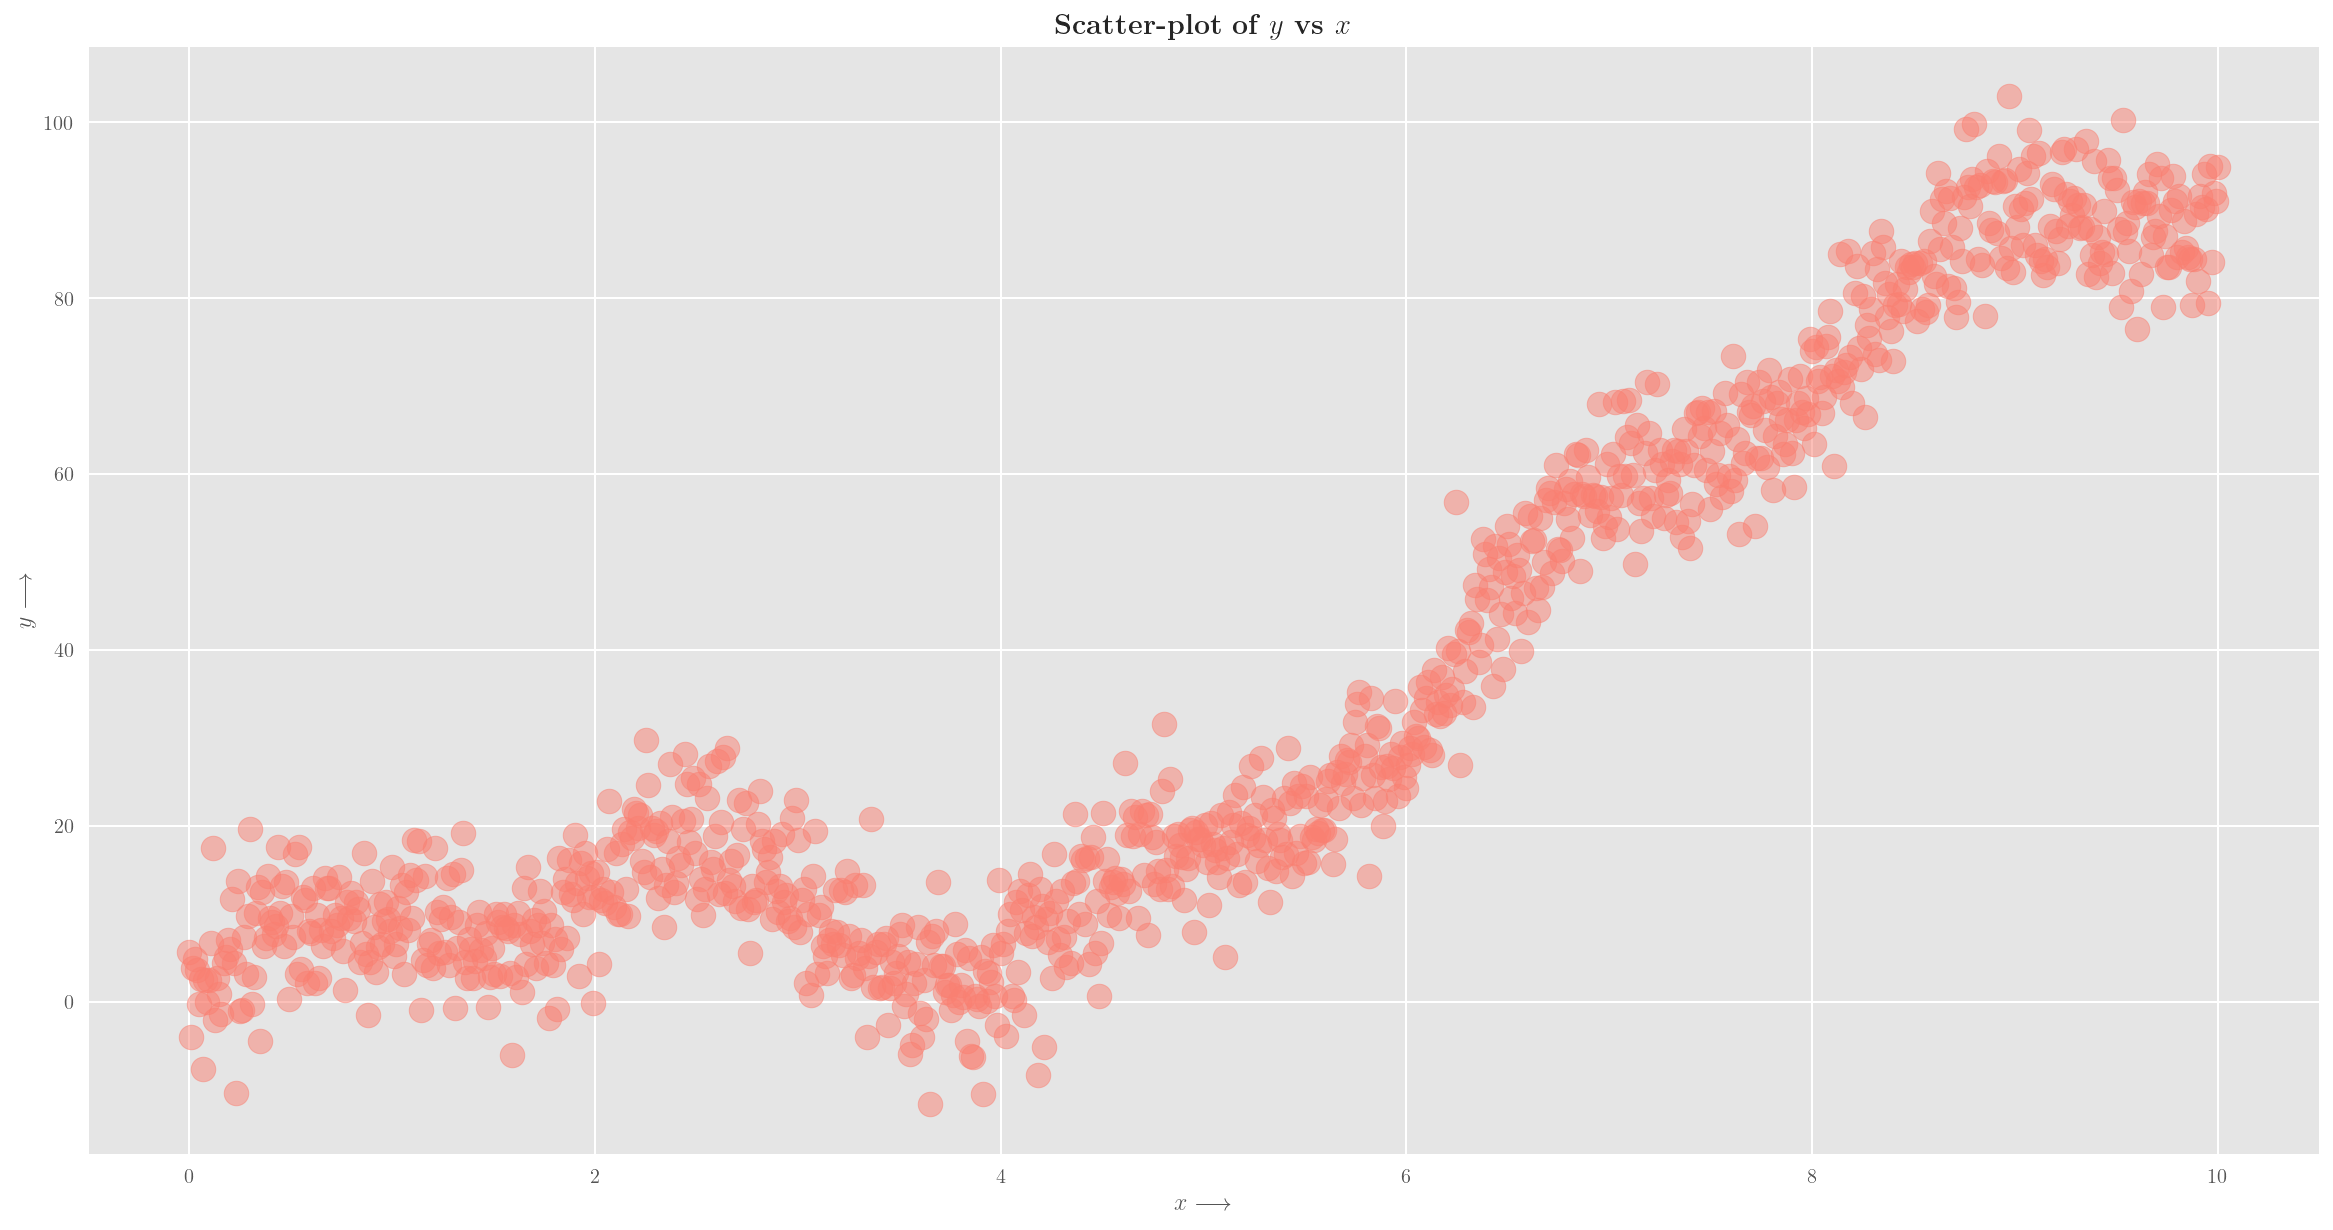

In [9]:
plt.scatter(data['x'], data['y'], alpha=0.5, s=150, color='salmon')
plt.title(r'\textbf{Scatter-plot of $y$ vs $x$}')
plt.xlabel(r'$x\longrightarrow$');
plt.ylabel(r'$y\longrightarrow$');

# Regression

From the figure above, it should be apparent that a simple linear regression model is unlikely to work. However, let us first build a simple linear regression model for this dataset, in order to get a baseline performance.

As usual, we will first separate out the predictor from the target, and then split the data into a training and test set.

In [10]:
X, y = data[['x']], data['y']

## Split the data into test and train subsets

In order to know how good at predicting are the regression models we will build, we need to take a subset of the data, and sort of "hide it under the pillow", and not allow the algorithm to see it during the training process. Then we can check if the model is making good predictions by comparing the said predictions against the actual target values.

Once again, observe how we follow the well established naming conventions for the training and test subsets of the data:


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,train_size=0.5)

## Build a linear regression model

Let us now build a regression model, and fit it to the dataset. For this, we instantiate a `LinearRegression` object named `model` using the constructor. Then we fit the `model` to the available training dataset.

In [12]:
model = LinearRegression();
model.fit(X_train, y_train);

Recall that a linear regression model is given by the equation:

\begin{equation} y =  \beta_0 + \beta_1 x + \epsilon\end{equation}

where:
$\epsilon$ is the irreducible error term, so that the model is essentially:

\begin{equation} \hat{y} =  \beta_0 + \beta_1 x \end{equation}

What values of $\beta_0$ (the intercept) and $\beta_1$ (the slope) is this model predicting? We can inspect this as follows:

In [13]:
print (f'Intercept: {model.intercept_}, Slope: {model.coef_}')

Intercept: -14.043716327900185, Slope: [9.91931896]


Look back at the data visualization, and see if this agrees with your own estimates.

## Predictions from the model

Now, let us use the model to make predictions on the **test** data, something the model has not seen so far. By comparing the predictions to the actual values, we will get a sense of how well the model has learned to generalize from the data. 


In [14]:
yhat = model.predict(X_test)
print("Mean Squared Error: %.2f"
      % mean_squared_error(y_test, yhat))
r2 = r2_score(y_test, yhat)
print(rf"Coefficient of Determination (R^2):{r2}")

Mean Squared Error: 197.67
Coefficient of Determination (R^2):0.7928030318320645


The coefficient of determination, $R^2$ indicates a dismal model! Should we plod on to the next step of model verification: namely the residual analysis.

## Residual Analysis

We will start by plotting the residuals from the predictions. Recall that the residual from the prediction $\hat{y}_i$ on a particular datum $(x_i, y_i)$ is defined as: 

\begin{equation}\mathbf{ r_i = \hat{y}_i  - y_i }\end{equation}

We will use the `yellowbrick` library for looking at the model characteristics.

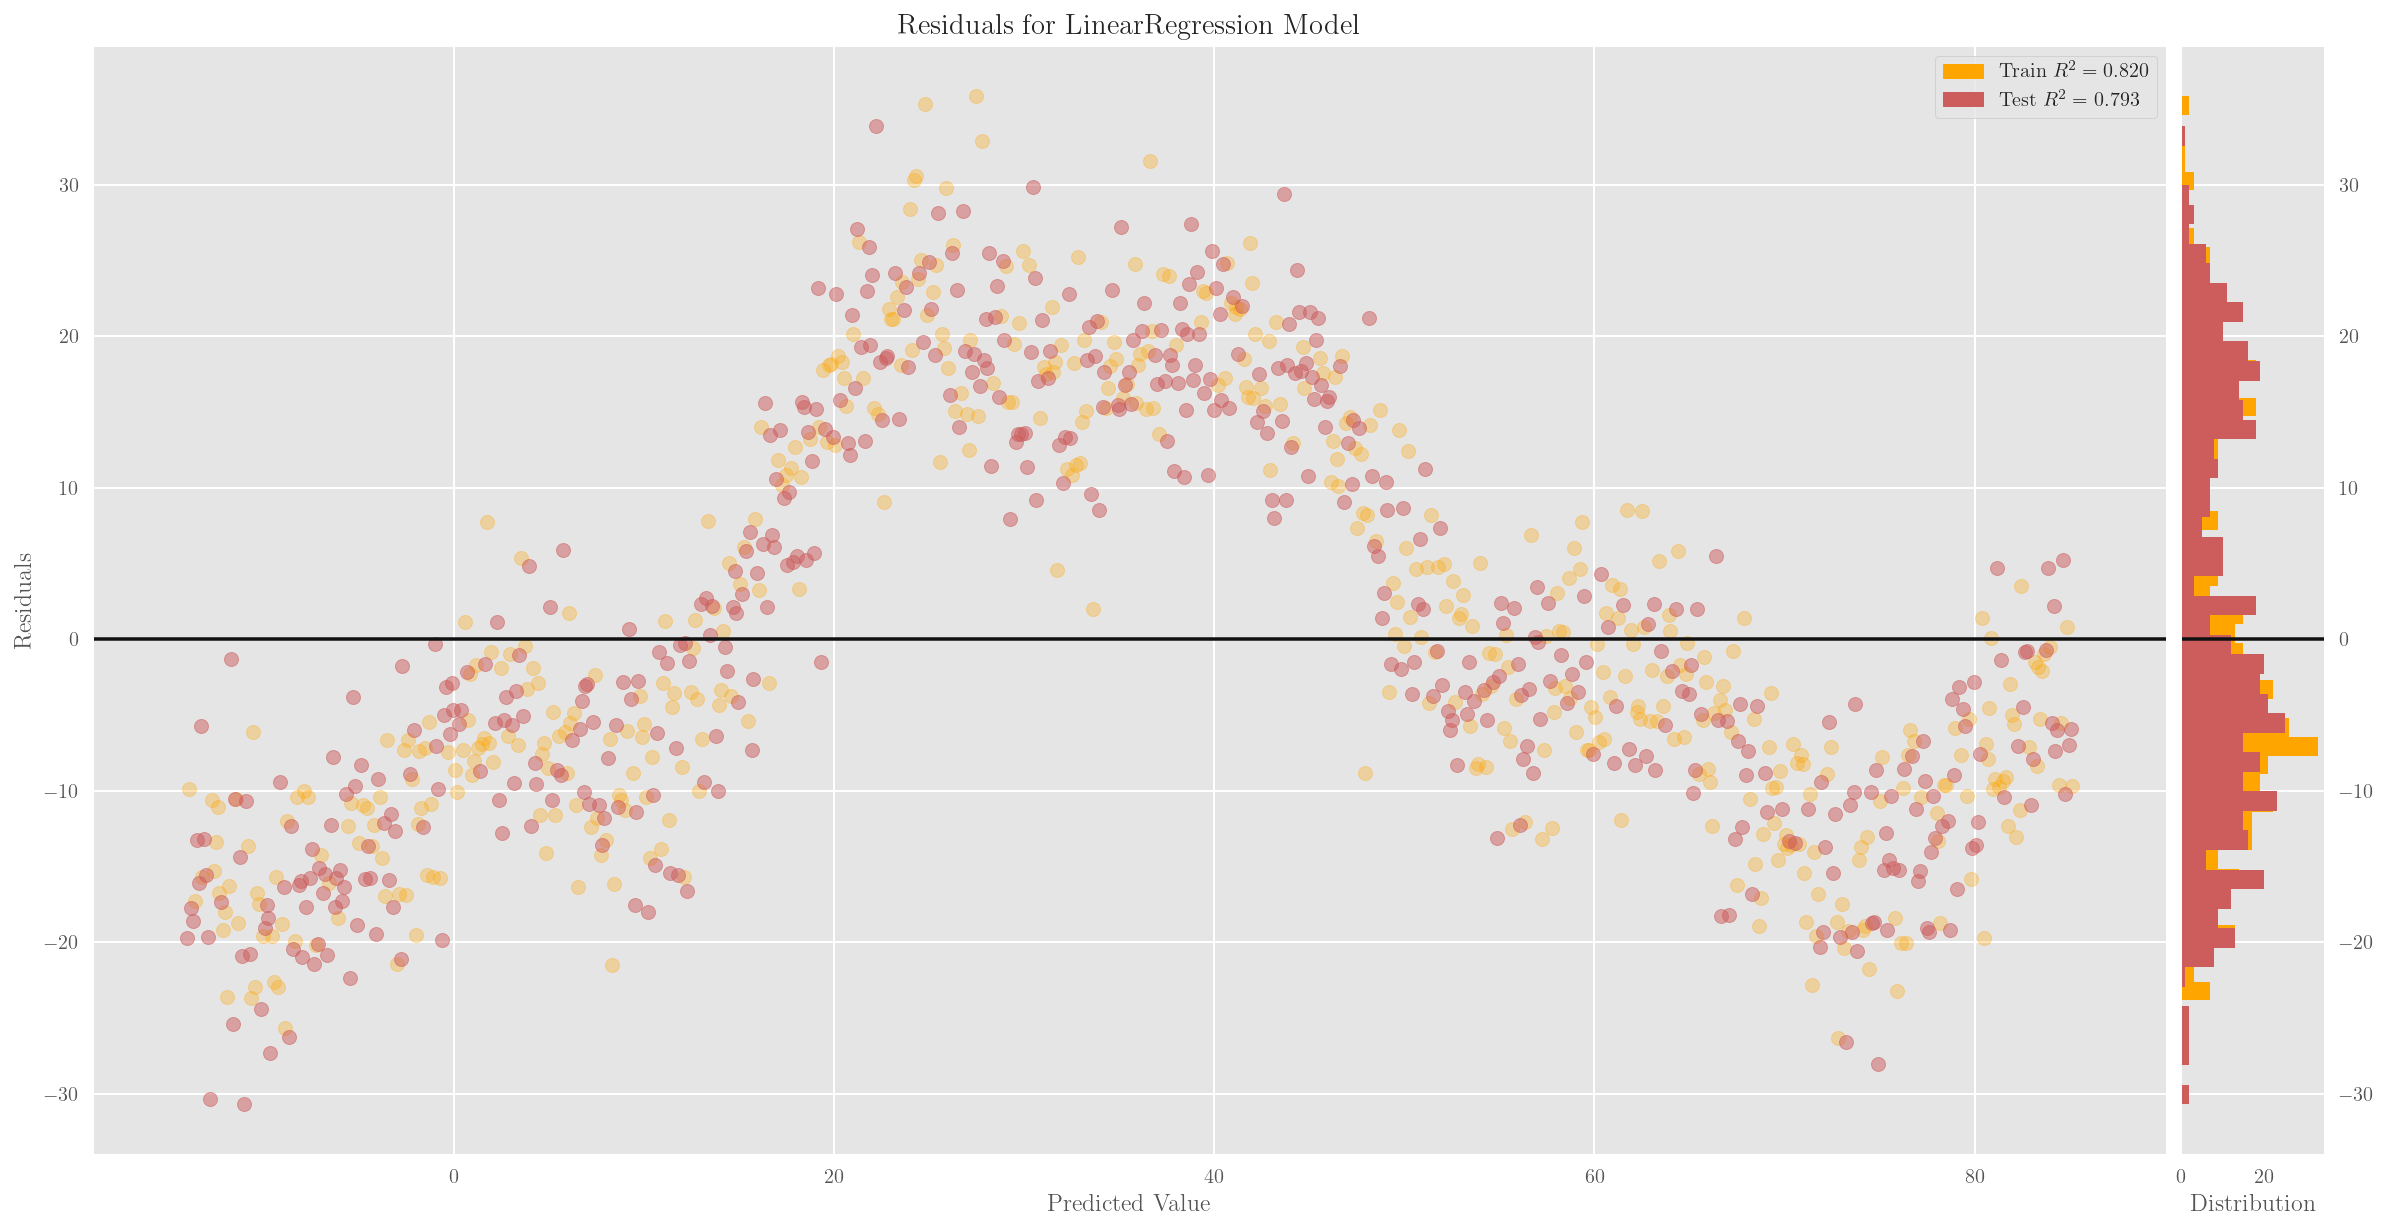

In [15]:
from yellowbrick.regressor import residuals_plot
viz = residuals_plot(model, X_train, y_train, X_test, y_test, 
                     train_color='orange', test_color='IndianRed', train_alpha=0.3, test_alpha=0.5)

The residuals display a striking pattern! The presence of a pattern in the residuals in a clear indication that the model has failed to capture some essential characteristics of the relationship between $x$ and $y$.

## Visualization of the model predictions

As a final step, let us visualize the predictions of the model, and superimpose it on the actual data. This should give us a sense of how well the model is working.

In [16]:
 
X = pd.DataFrame(data={'x': np.linspace(data.x.min(), data.x.max(), 1000)}) 
yhat = model.predict(X)

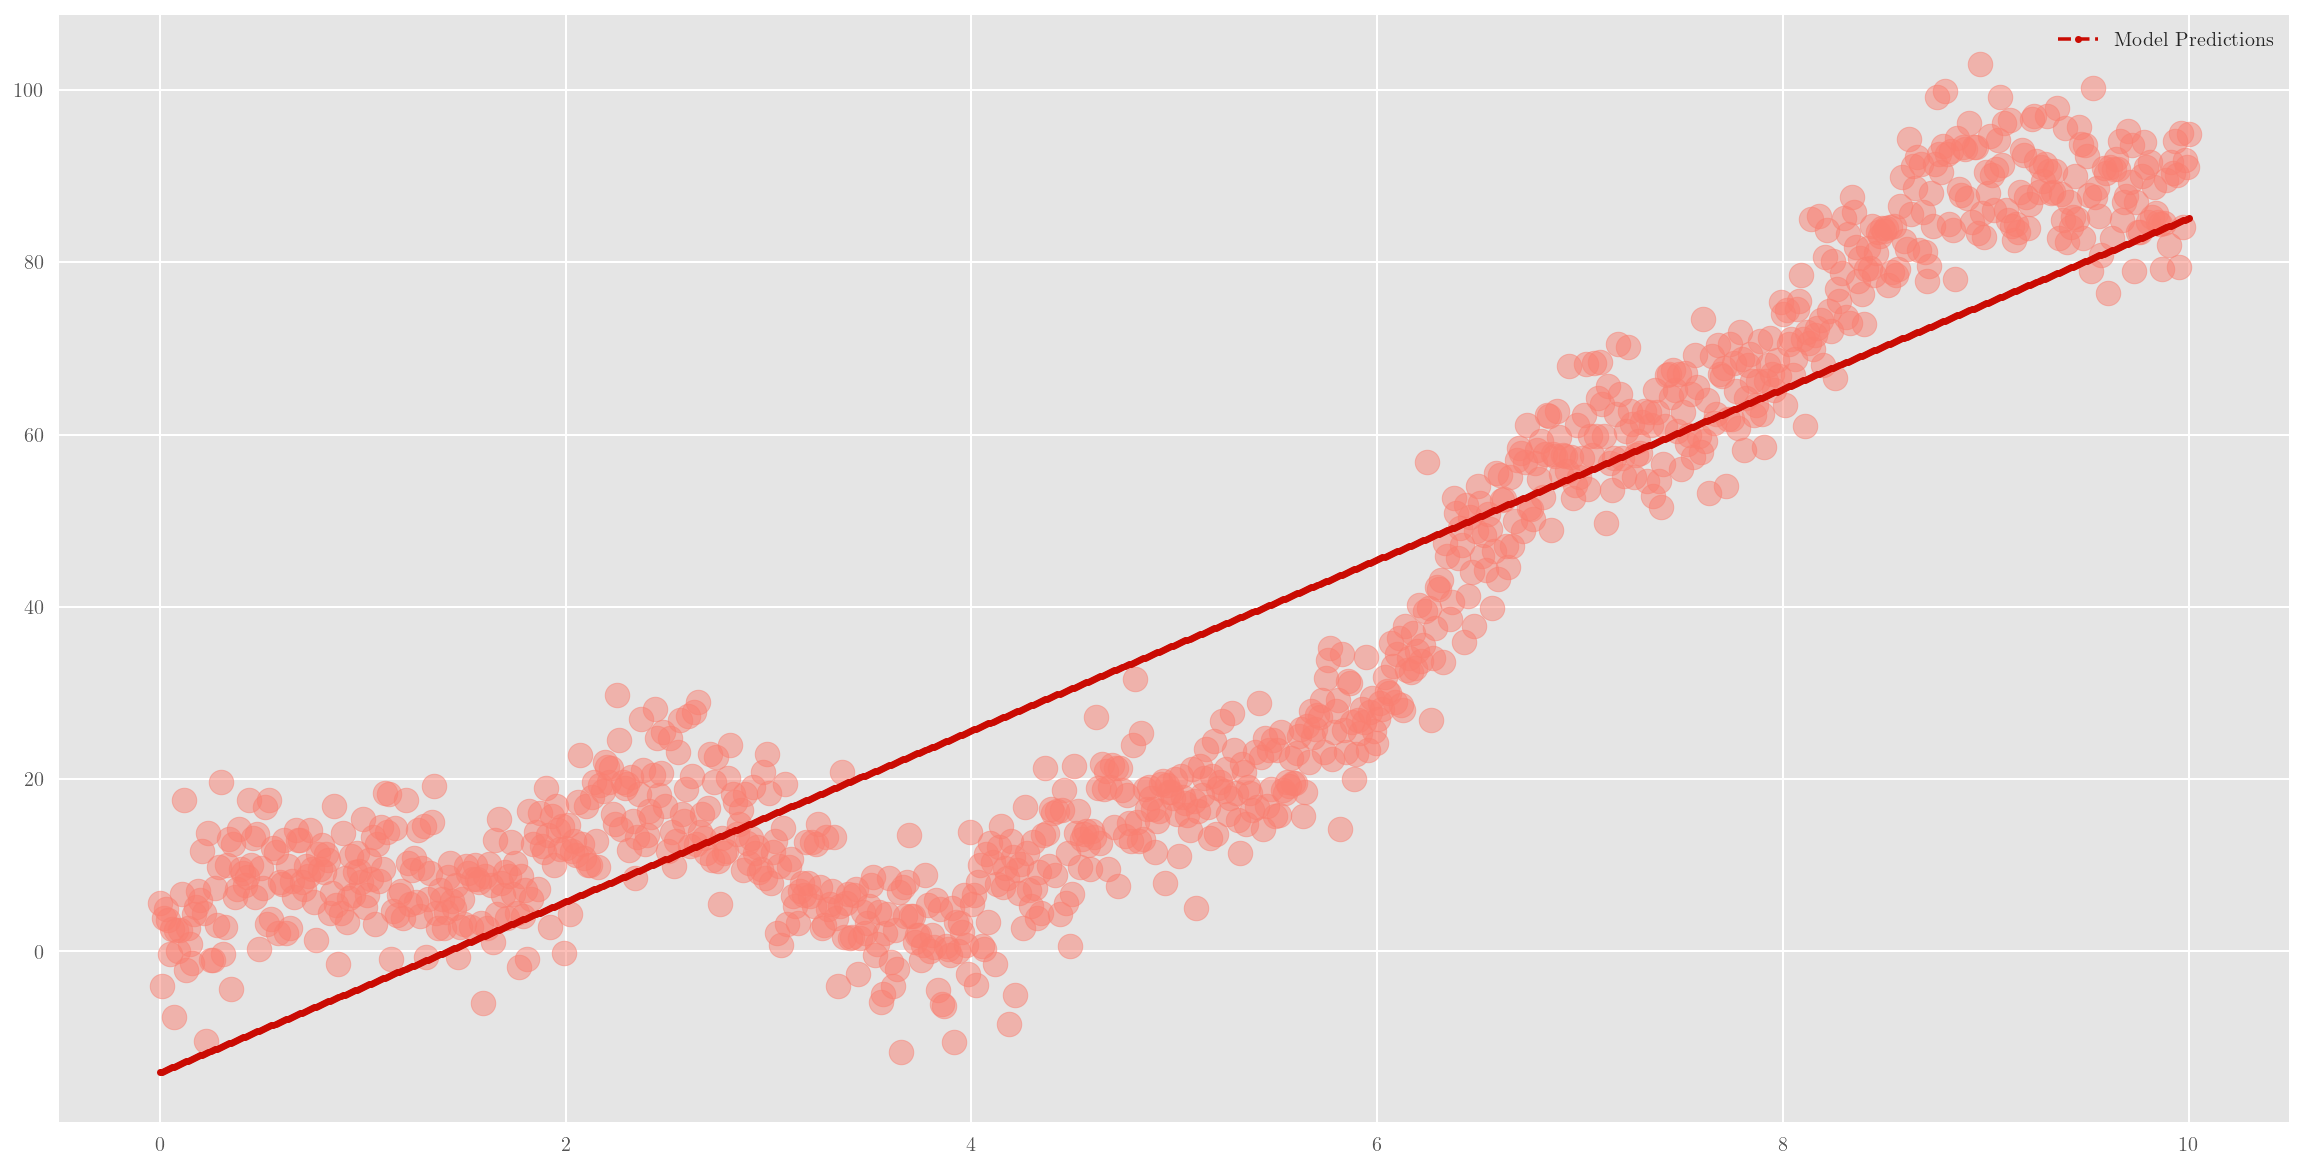

In [17]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(data['x'], data['y'], alpha=0.5, s=150, color='salmon')
ax.plot(X.x, yhat, 'r--.', label="Model Predictions")
ax.legend(loc='best');

This simple linear model has, as one would have expected by now, failed terribly!

##### Polynomial Regression

The lesson from the prior notebooks is that adding polynomial features to the dataset, and then performing the regression can be an effective tool. Will this work here? Let's find out.

**Recall the fact we mentioned in our theory sessions: since we observe 5 distinct bends in the data, we should expect a polynomial of degree no less than 6 to fit the data.** With some experimentation, we find that a polynomial of degree 6 proves reasonably effective.

In the interest of brevity, we have merged the steps of:
* create polynomial degrees of the input
* fit a linear model to the data
* make predictions on test data
* print model diagnostics

In [18]:
degree     = 6
polynomial = PolynomialFeatures(degree)
X_poly = polynomial.fit_transform(X_train)
model = LinearRegression()
# Now, train the model
model.fit(X_poly, y_train)
print ("The cofficients: {}".format(model.coef_))
X_poly_test = polynomial.fit_transform(X_test)
yhat = model.predict(X_poly_test)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, yhat))
r2 = r2_score(y_test, yhat)
print(rf"Coefficient of Determination (R^2):{r2}")

The cofficients: [ 0.00000000e+00  6.56454484e+00  4.52976734e+00 -4.63396588e+00
  1.21238191e+00 -1.20125831e-01  4.09273472e-03]
Mean squared error: 38.38
Coefficient of Determination (R^2):0.9597724460357856


The coefficient of determination seems quite encouraging. Let us now proceed to the residual analysis.

## Residual Analysis

We will start by plotting the residuals from the predictions. Recall that the residual from the prediction $\hat{y}_i$ on a particular datum $(x_i, y_i)$ is defined as: 

\begin{equation}\mathbf{ r_i = \hat{y}_i  - y_i }\end{equation}

We will use the `yellowbrick` library for looking at the model characteristics.

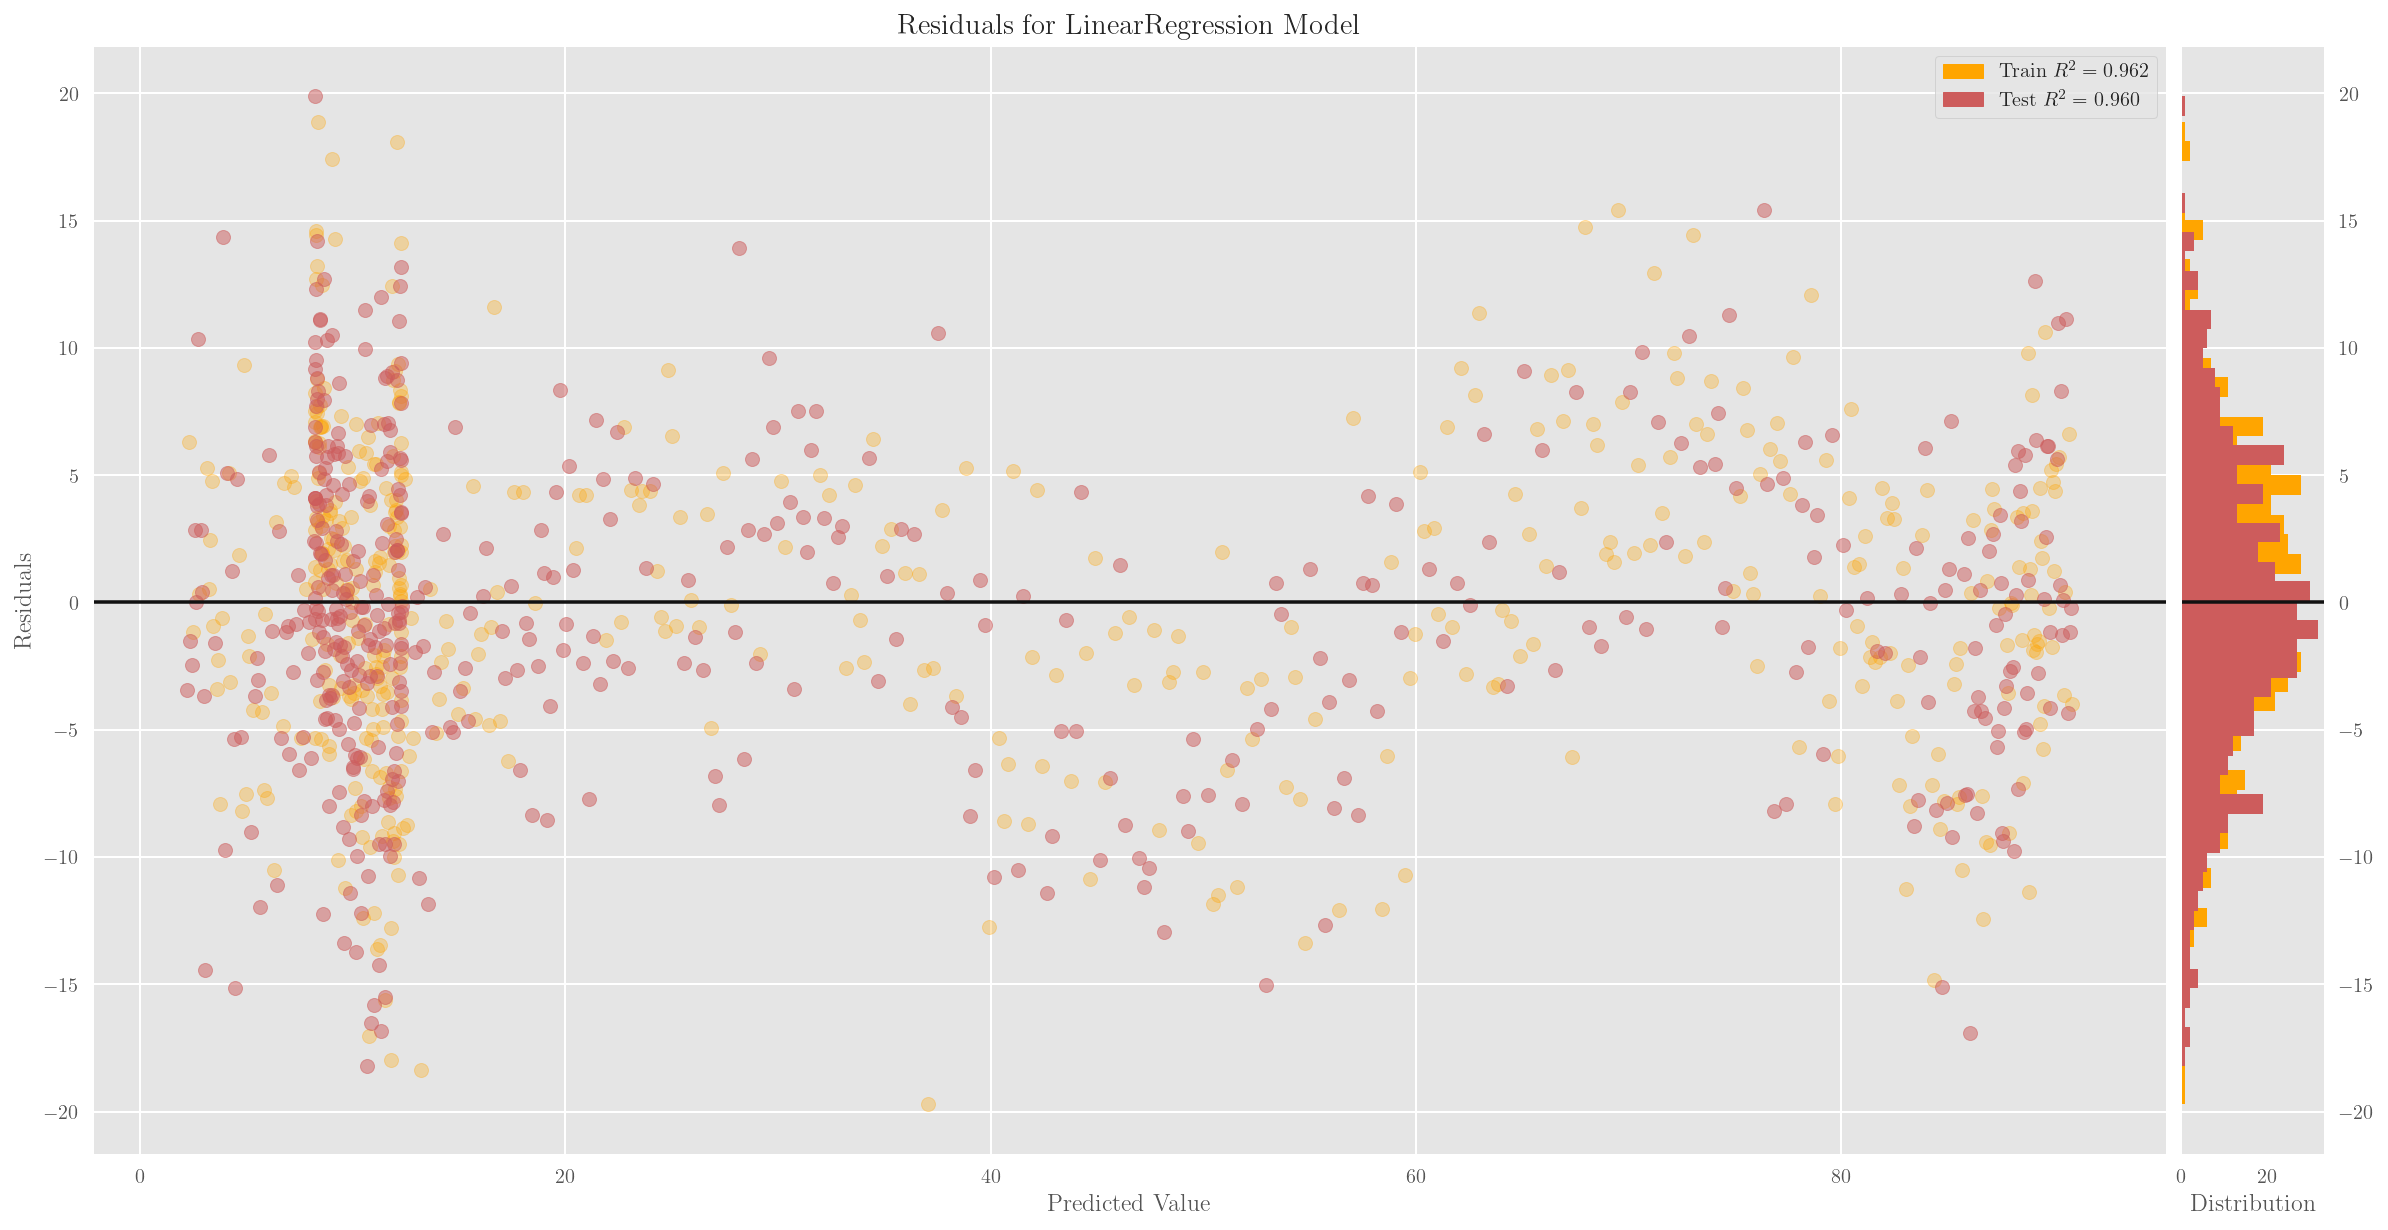

In [19]:
from yellowbrick.regressor import residuals_plot
viz = residuals_plot(model, X_poly, y_train, X_poly_test, y_test, 
                     train_color='orange', test_color='IndianRed', train_alpha=0.3, test_alpha=0.5)

There is only an approximate homoscedasticity of the residuals, and while no pronounced patterns are visible, we can see subtle patterns. **In essence, it implies that we may not have captured the underlying data generating function so well, after all, despite the very good coefficient of determination.**

## Visualization of the model predictions

As a final step, let us visualize the predictions of the model, and superimpose it on the actual data. This should give us a sense of how well the model is working.

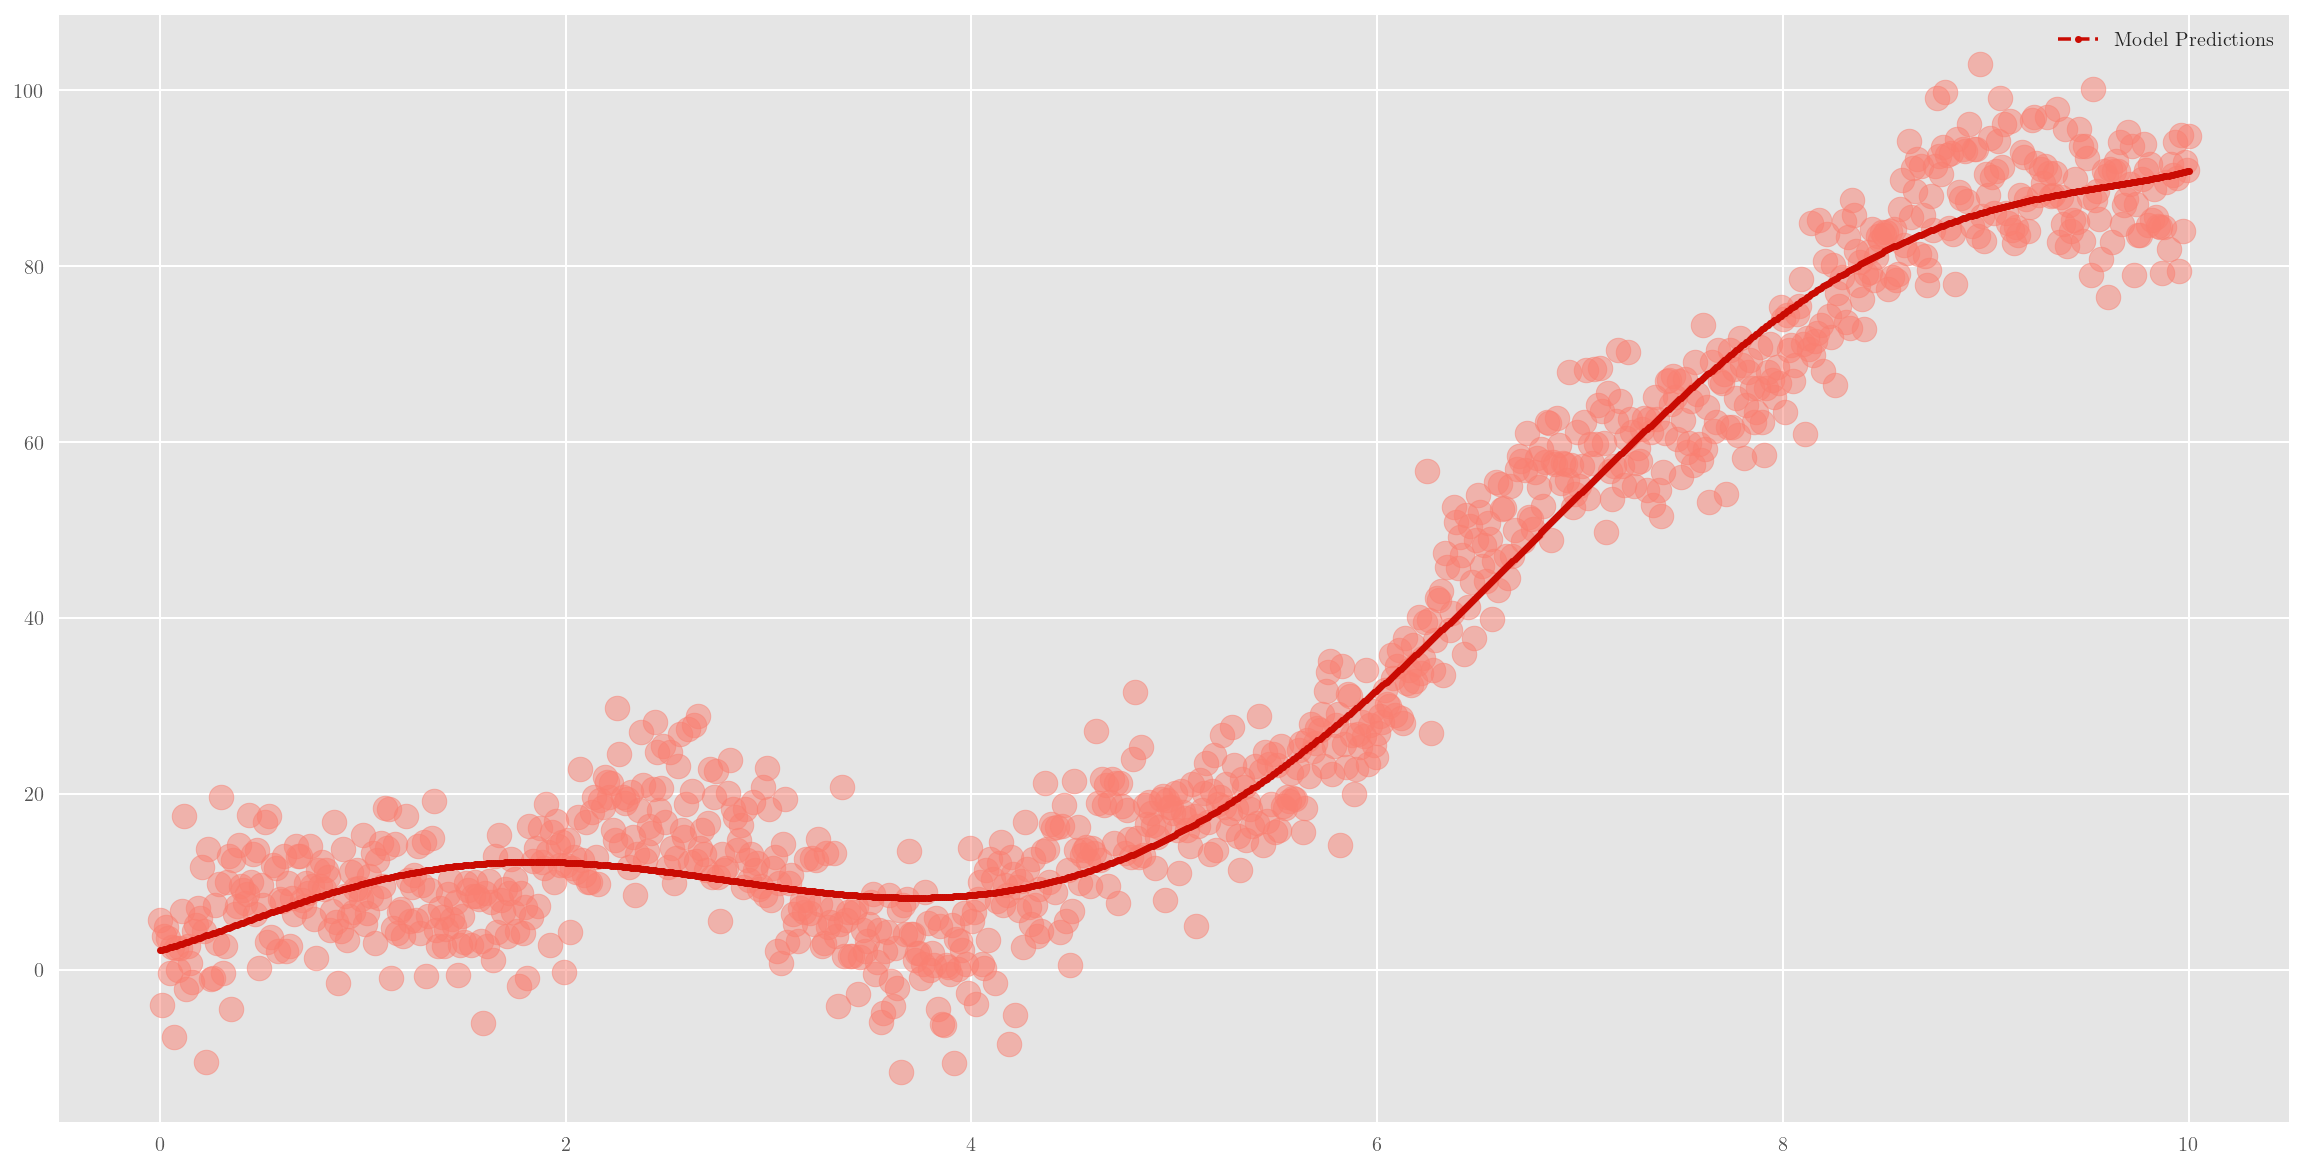

In [20]:
 
X = pd.DataFrame(data={'x': np.linspace(data.x.min(), data.x.max(), 1000)}) 
yhat = model.predict(polynomial.transform(X))

fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(data['x'], data['y'], alpha=0.5, s=150, color='salmon')
ax.plot(X.x, yhat, 'r--.', label="Model Predictions")
ax.legend(loc='best');

A careful observation of the prediction curve shows that it 
has missed some of the nonlinearities in the data, even though it is 
seems to be fairly good smoothing approximation.

## Going to higher degree polynomial

Should we dare to try out polynomials of much higher degrees? If we observe the subtle undulations in the data distribution, one may discern ten or eleven subtle bends. What would happen, therefore, if we take a polynomial of degree twelve, as we should, based on the count of bends? Let's find out.

In [21]:
degree     = 12
polynomial = PolynomialFeatures(degree)
X_poly = polynomial.fit_transform(X_train)
model = LinearRegression()
# Now, train the model
model.fit(X_poly, y_train)
print ("The cofficients: {}".format(model.coef_))
X_poly_test = polynomial.fit_transform(X_test)
yhat = model.predict(X_poly_test)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, yhat))
r2 = r2_score(y_test, yhat)
print(rf"Coefficient of Determination (R^2):{r2}")

The cofficients: [ 0.00000000e+00  3.36429115e+01  3.69446132e+01 -2.20877998e+02
  2.97895419e+02 -2.00429589e+02  7.98528418e+01 -2.02533144e+01
  3.36679464e+00 -3.66110119e-01  2.51099270e-02 -9.86213705e-04
  1.69140113e-05]
Mean squared error: 32.26
Coefficient of Determination (R^2):0.9661890335300809


Observe that the coefficient of determination has only marginally improved.

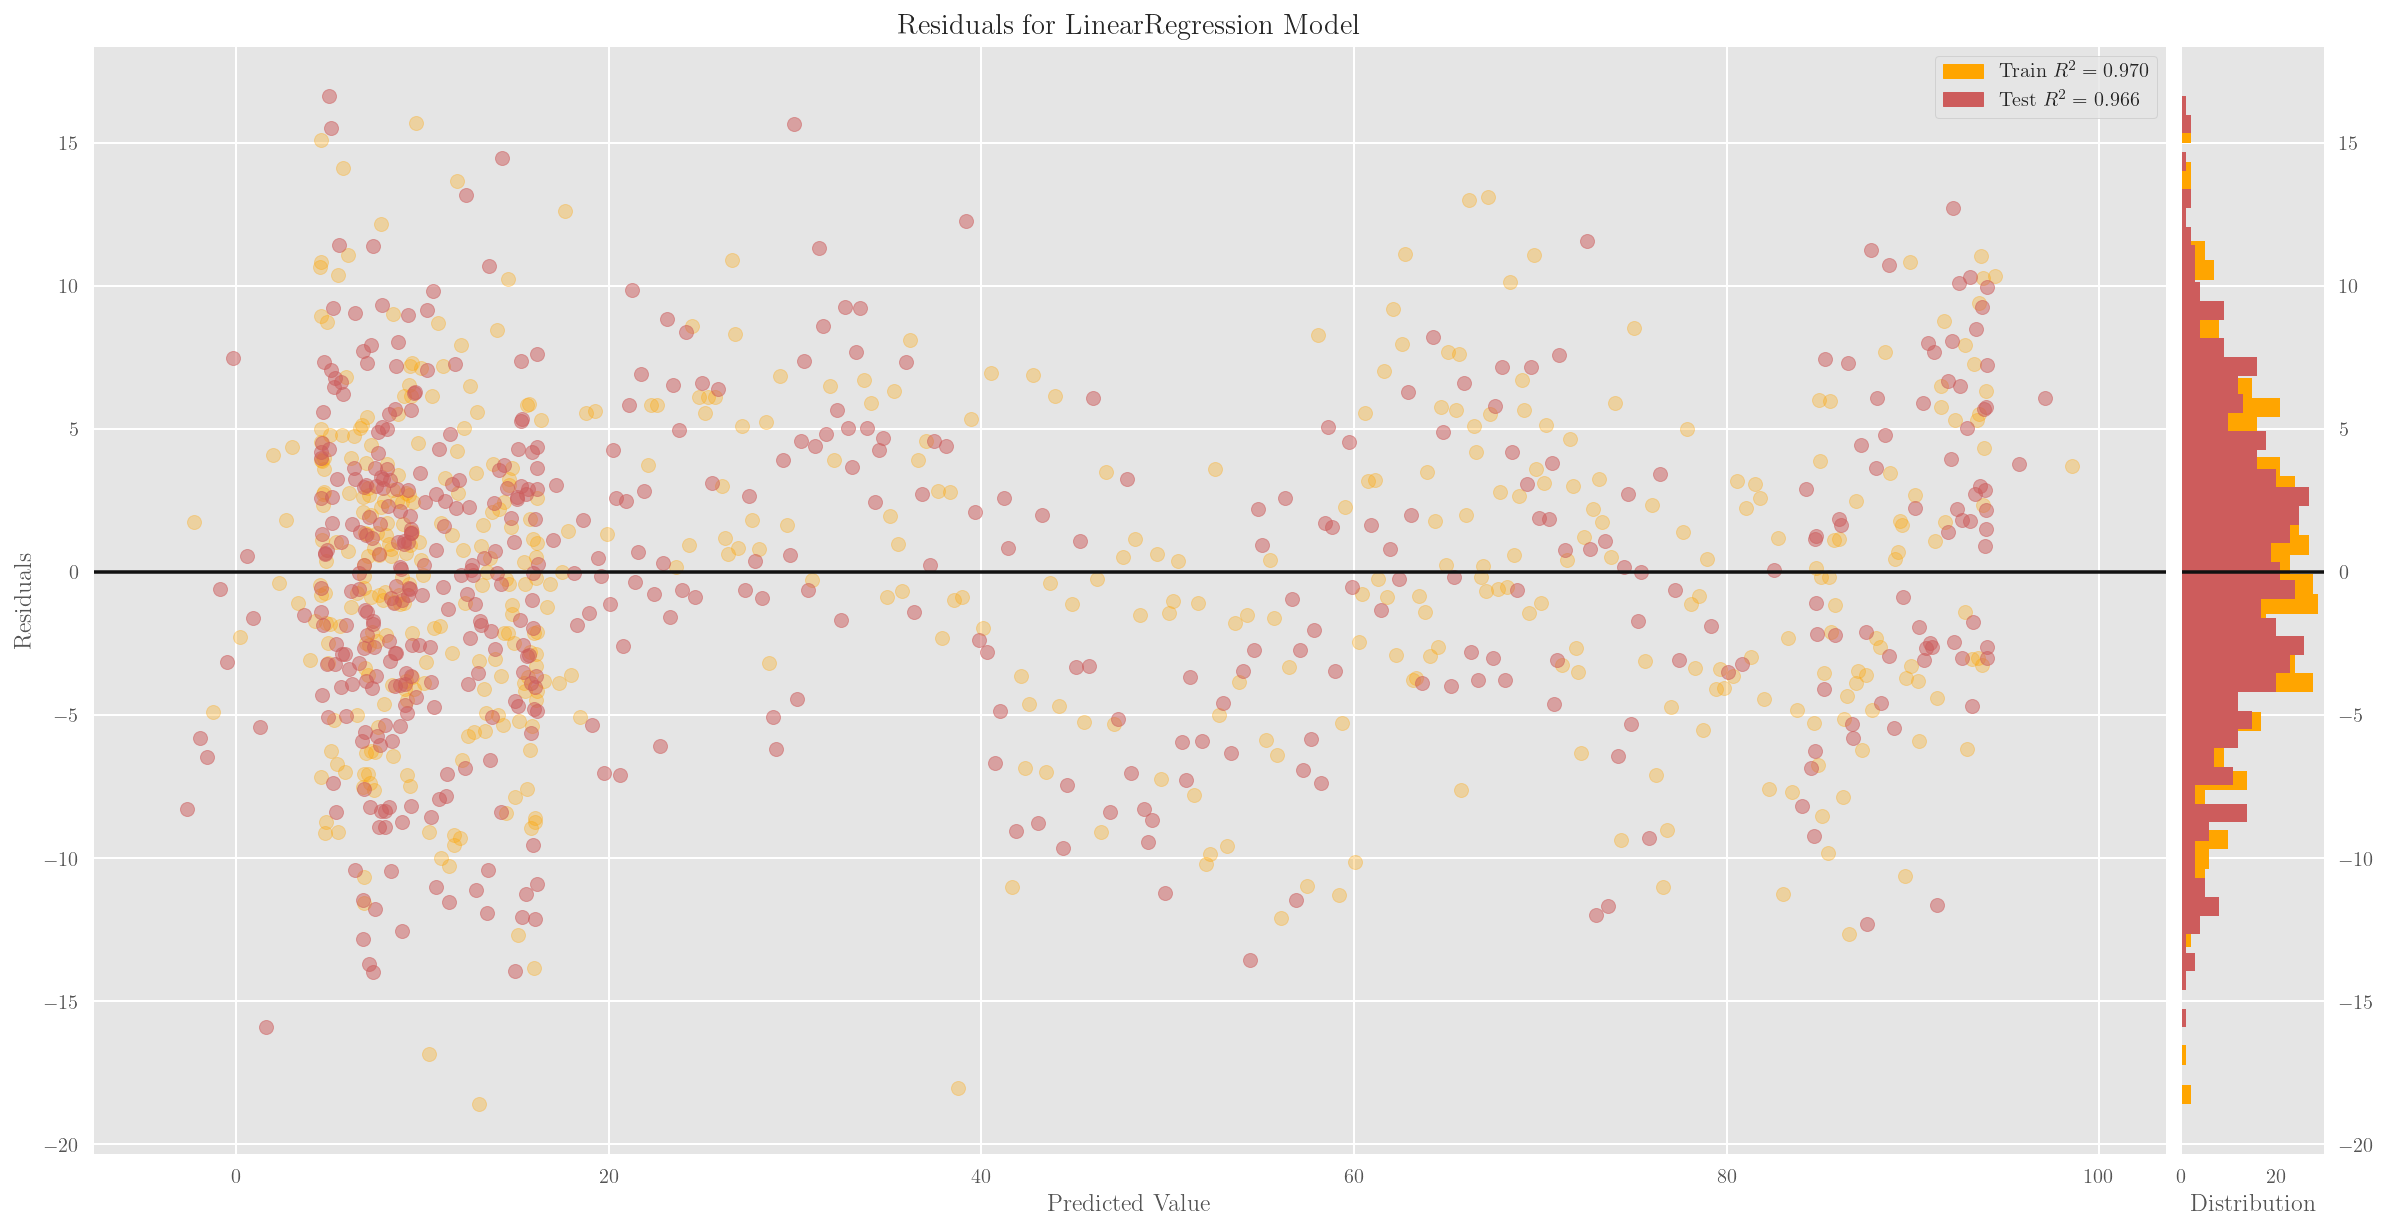

In [22]:
from yellowbrick.regressor import residuals_plot
viz = residuals_plot(model, X_poly, y_train, X_poly_test, y_test, 
                     train_color='orange', test_color='IndianRed', train_alpha=0.3, test_alpha=0.5)

The residuals, too, don't seem to have improved much.

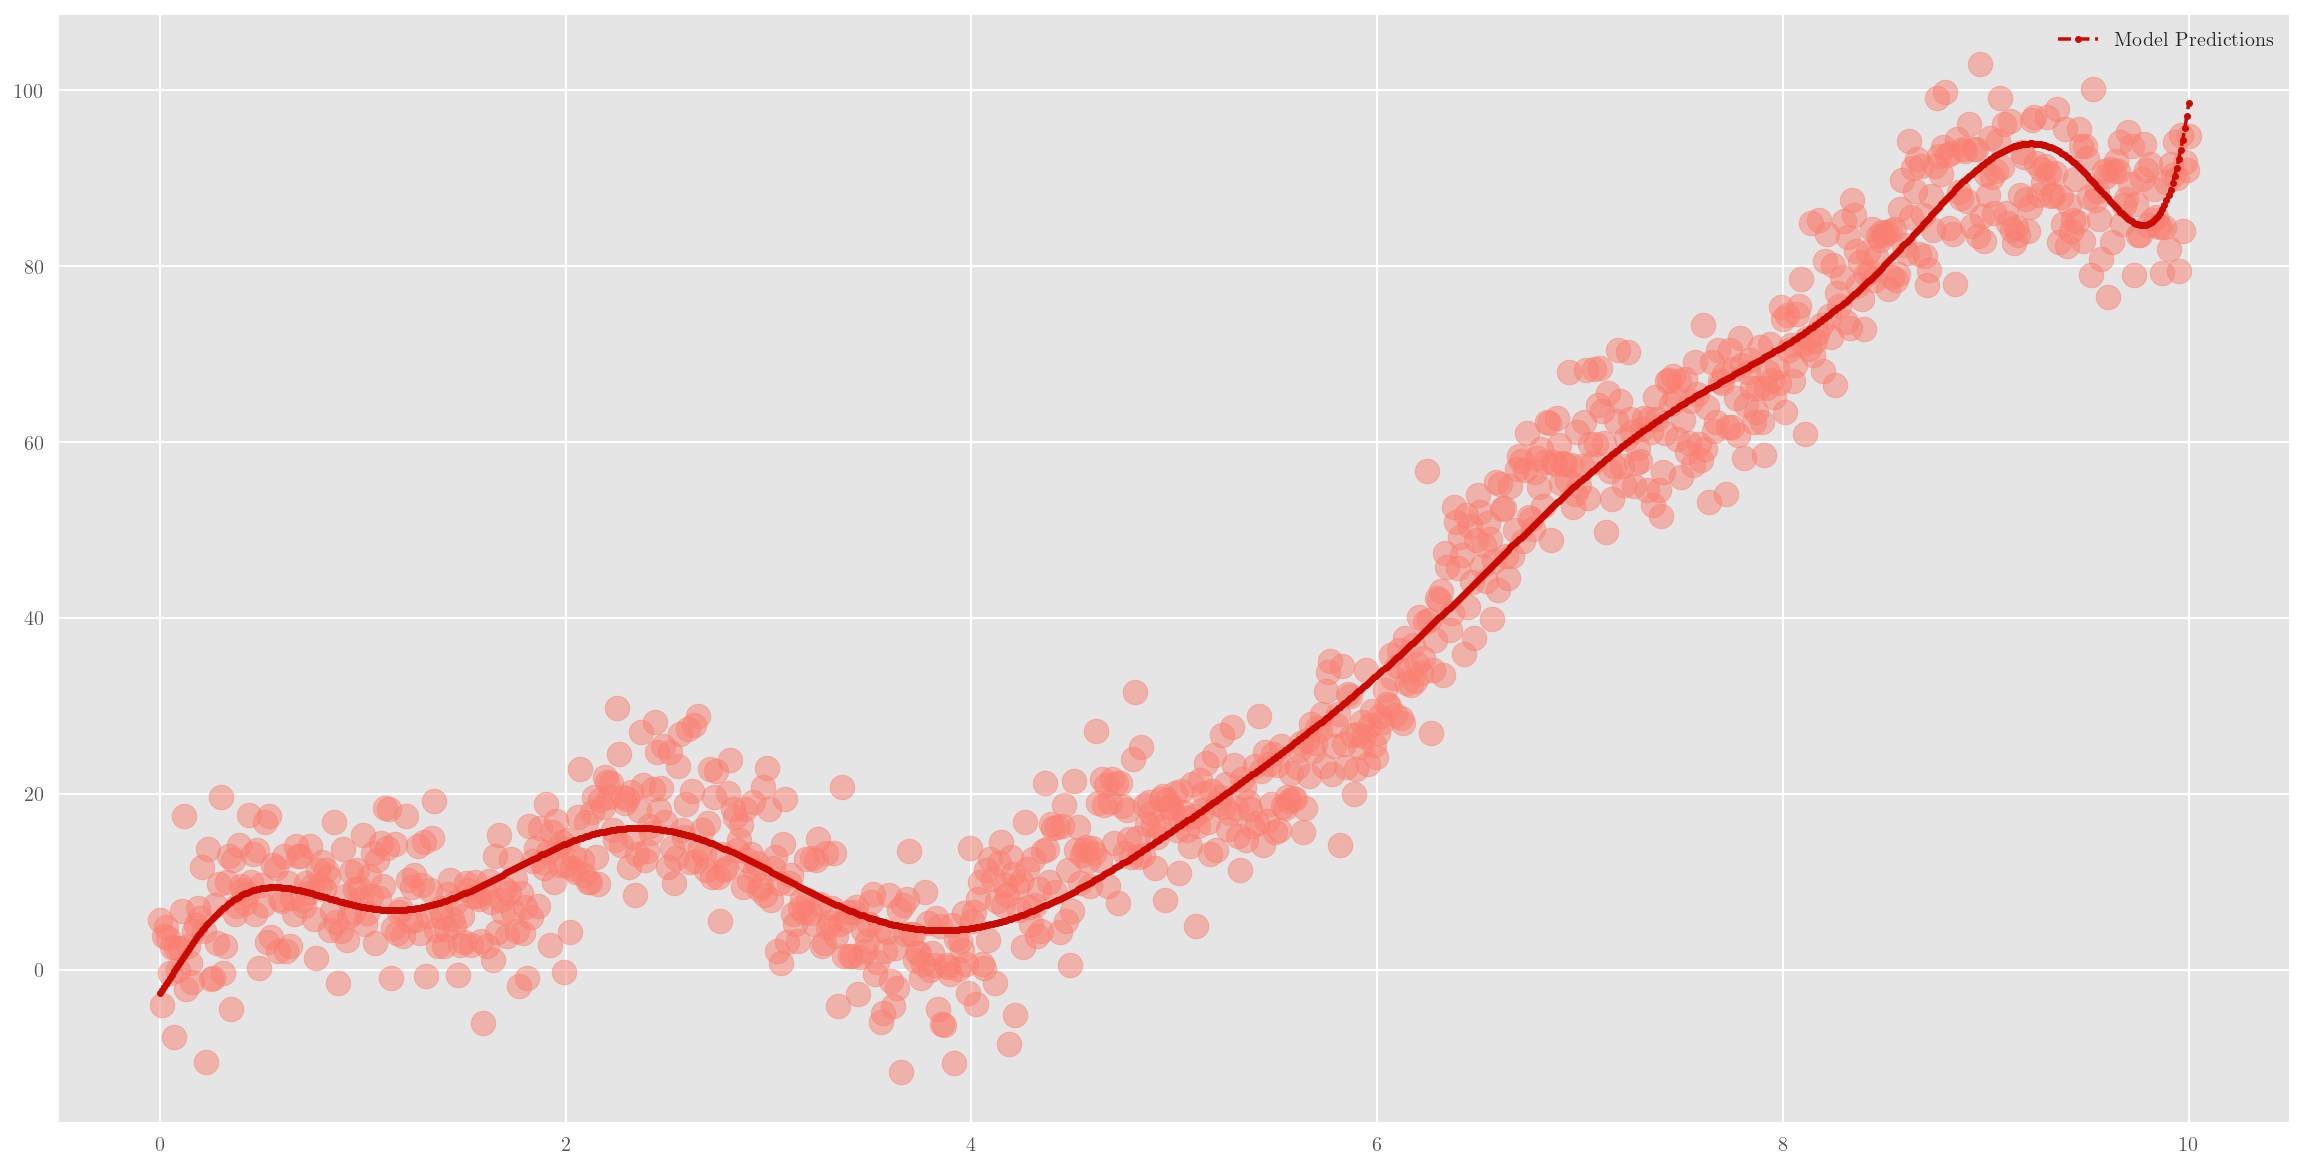

In [23]:
 
X = pd.DataFrame(data={'x': np.linspace(data.x.min(), data.x.max(), 1000)}) 
yhat = model.predict(polynomial.transform(X))

fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(data['x'], data['y'], alpha=0.5, s=150, color='salmon')
ax.plot(X.x, yhat, 'r--.', label="Model Predictions")
ax.legend(loc='best');

The curve does seem to have materially improved. However, notice the emergence of Runge's phenomenon on the extreme right, as oscillations. This becomes even more pronounced if we extends the domain of the predictions a little bit.

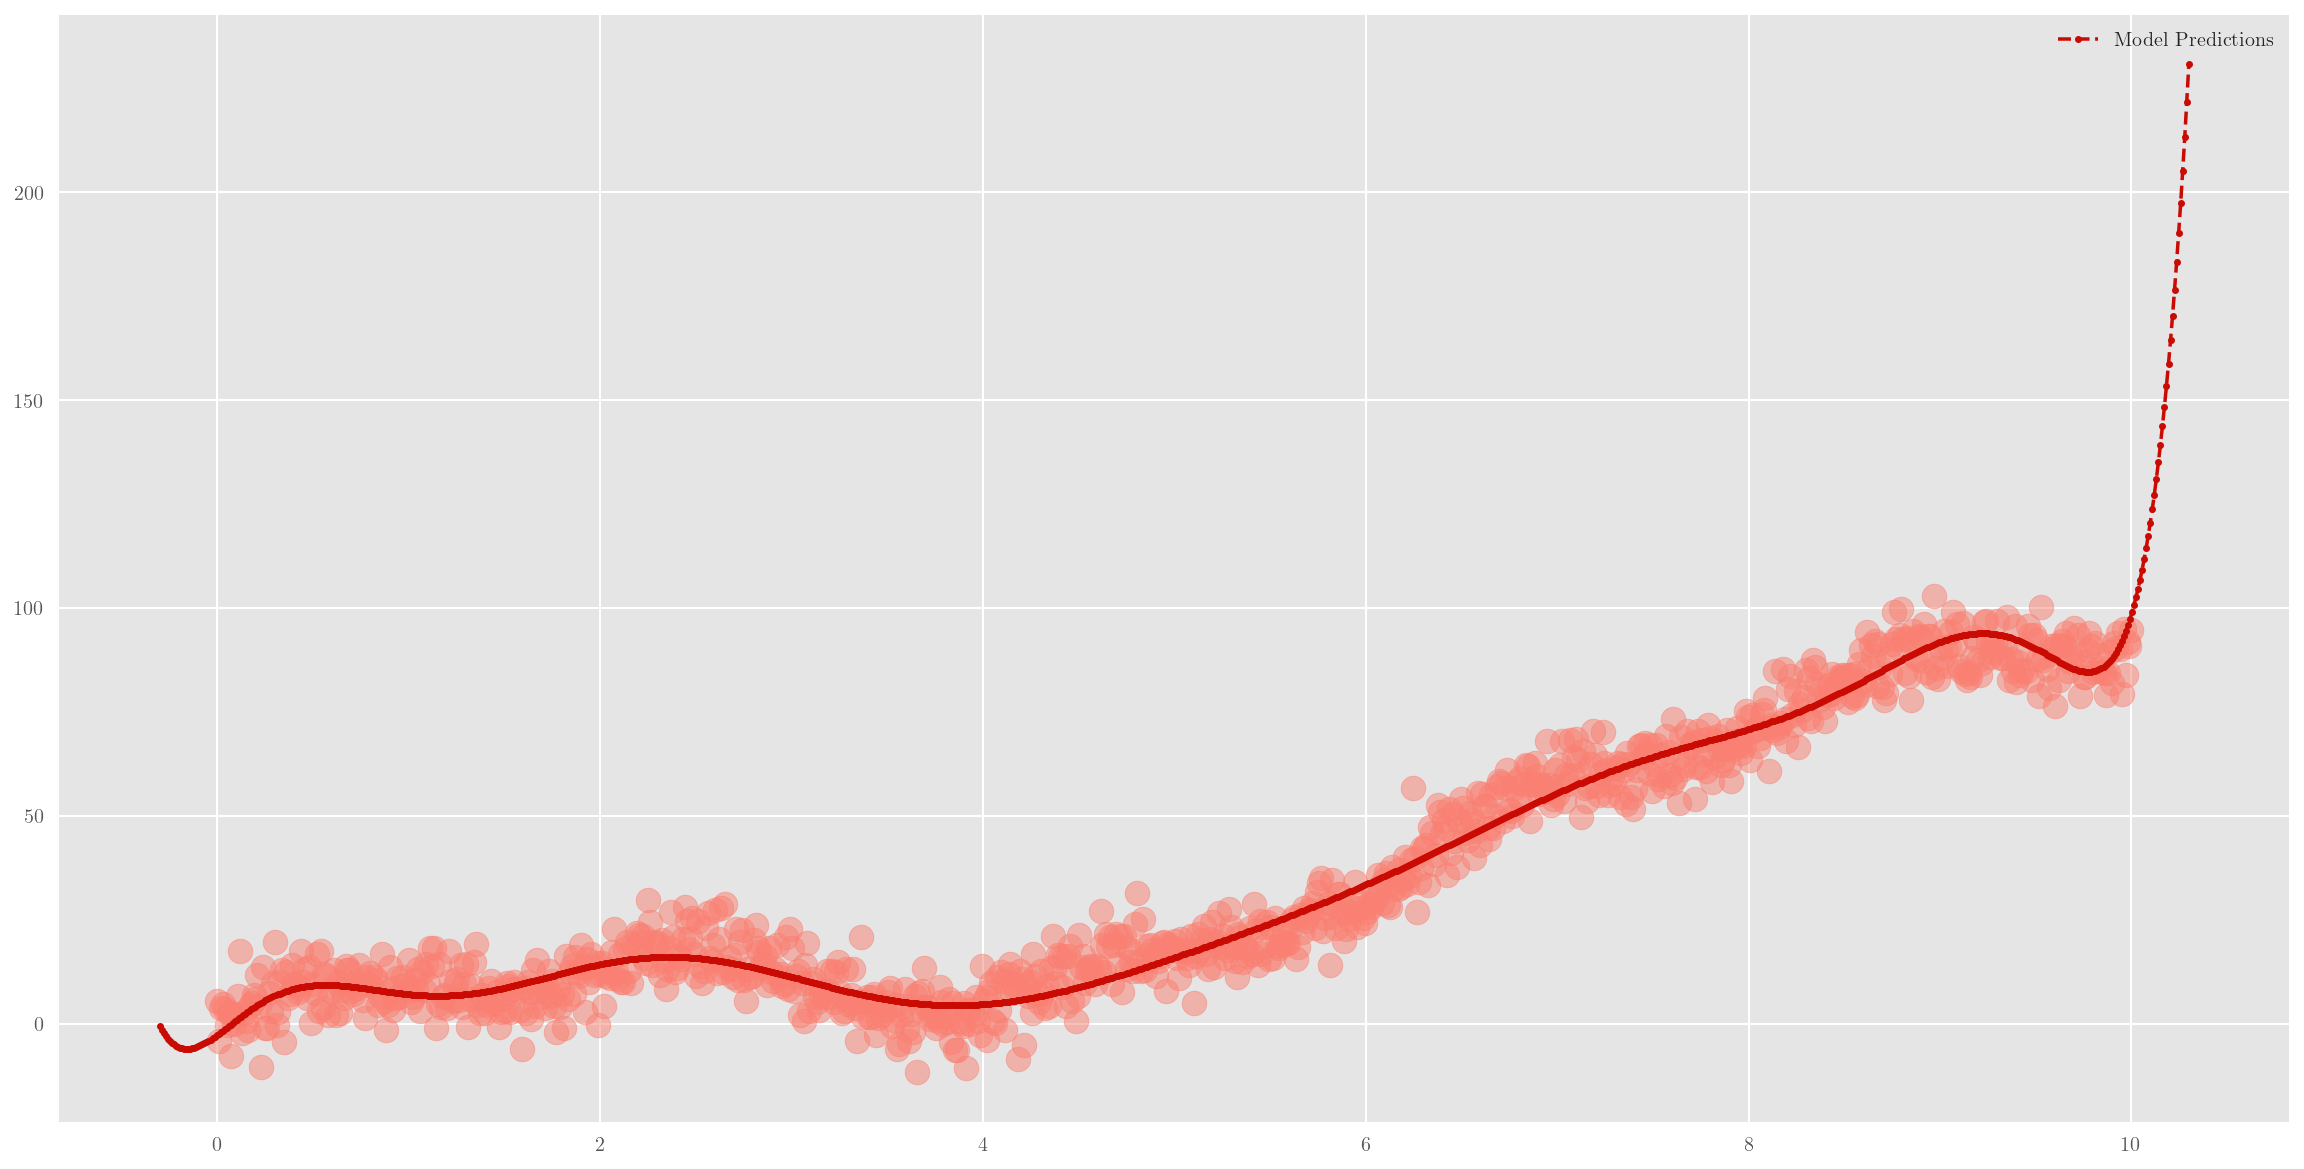

In [24]:
 
X = pd.DataFrame(data={'x': np.linspace(data.x.min()-0.3, data.x.max()+0.3, 1000)}) 
yhat = model.predict(polynomial.transform(X))

fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(data['x'], data['y'], alpha=0.5, s=150, color='salmon')
ax.plot(X.x, yhat, 'r--.', label="Model Predictions")
ax.legend(loc='best');

# Conclusion

For this dataset, polynomial regression has proved reasonably effective. So long as we keep the polynomial to six or so, we do not see pronounced Runge's phenomenon. However, beyond that, the oscillations at the periphery begin to get pronounced.

With polynomials, it seems hard to capture the subtle undulations in the curve. This leads us to believe that this data was generated with some transcendental functions involved.
